In [29]:
import pandas as pd
import numpy as np
import sqlite3
import re

In [30]:
conexion = sqlite3.connect("Datos")
cursor = conexion.cursor()

In [31]:
users = pd.DataFrame(cursor.execute("select * from usuarios").fetchall(), columns = [0,"id_user","name_user","username_user"]).set_index(0)

In [32]:
users.drop_duplicates(subset = "id_user", inplace = True)

In [33]:
tweets = pd.DataFrame(cursor.execute("select * from tweets").fetchall(), columns = [0,"id_tweet","mensaje_tweet", "fecha_tweet", "author_tweet", "retweet_count", "reply_count", 
"like_count", "quote_count"]).set_index(0)

In [34]:
data = pd.merge(users, tweets, left_on = "id_user", right_on = "author_tweet")

In [35]:
data["fecha_tweet"] = pd.to_datetime(pd.to_datetime(data["fecha_tweet"], infer_datetime_format=True).dt.strftime("%y/%m/%d"))

In [8]:
REPLACE_NO_SPACE = re.compile(r"(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)|(\n)")
NO_SPACE = ""
SPACE = " "

In [9]:
mensaje1 = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in data["mensaje_tweet"]]
mensaje2 = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in mensaje1]

In [10]:
data["mensaje_tweet"] = mensaje2

In [11]:
data.head()

,id_user,name_user,username_user,id_tweet,mensaje_tweet,fecha_tweet,author_tweet,retweet_count,reply_count,like_count,quote_count
0,1003872445,Pau Mugarra,PauMugarra,1577334577701453827,recordaros que la semana que viene tenemos la ...,2004-10-22,1003872445,2,0,12,0
1,1003872445,Pau Mugarra,PauMugarra,1573246948693651456,y seguimos con lo prometido primera quedada d...,2023-09-22,1003872445,7,0,20,4
2,1003872445,Pau Mugarra,PauMugarra,1541674892390719490,@heavymental_es @davidalayon @recuenco @_miki ...,2028-06-22,1003872445,0,3,2,0
3,2529499620,Formación Fundación Universidad Carlos III,formacion_fuc3,1576902991507922944,el desarrollador web es uno de los perfiles má...,2003-10-22,2529499620,3,0,3,0
4,706520411551494145,JoseSola,Jose_Sola_,1576856703349374976,@jorgegrev @thebridge_tech enhorabuena crack,2003-10-22,706520411551494145,0,0,1,0


--------

## A. ¿Cuál es el tweet con mayor repercusión?

In [50]:
data[data["retweet_count"] == data["retweet_count"].max()]

,id_user,name_user,username_user,id_tweet,mensaje_tweet,fecha_tweet,author_tweet,retweet_count,reply_count,like_count,quote_count,repercusion
37,106344840,Cámara de Comercio de Sevilla,camaradesevilla,1564951151124029441,¿Quieres impulsar tu perfil profesional en el ...,2031-08-22,106344840,11,0,13,0,24


In [45]:
data[data["like_count"] == data["like_count"].max()]["mensaje_tweet"][79]

'El sentido de la vida ya no es 42 -- Light Mental edición especial @TheBridge_Tech https://t.co/z7hOVln8Bp'

In [46]:
data[data["reply_count"] == data["reply_count"].max()]["mensaje_tweet"][88]

'🕣 TIC, TAC: MAÑANA os vemos a todos a las 7.30pm en nuestro evento en directo en MADRID en @TheBridge_Tech \n\n🚨Para los que no vayáis, TRANQUILOS, seguramente el martes lo emitamos para todos vosotros :D https://t.co/fqaYsbyxl7'

In [51]:
data[data["quote_count"] == data["quote_count"].max()]

,id_user,name_user,username_user,id_tweet,mensaje_tweet,fecha_tweet,author_tweet,retweet_count,reply_count,like_count,quote_count,repercusion
1,1003872445,Pau Mugarra,PauMugarra,1573246948693651456,Y seguimos con lo prometido:\n\nPrimera quedad...,2023-09-22,1003872445,7,0,20,4,31


In [40]:
data["repercusion"] = data["quote_count"] + data["reply_count"] + data["like_count"] + data["retweet_count"]

In [41]:
data[data["repercusion"] == data["repercusion"].max()]["mensaje_tweet"][1]

'Y seguimos con lo prometido:\n\nPrimera quedada de la comunidad #CPS en Madrid 🚀:\nhttps://t.co/xnWjKu6fPi\nen un espacio cedido por @TheBridge_Tech.'

## B. ¿Cuál es el usuario que más menciona a la escuela?

In [55]:
data["username_user"].value_counts().index[0]

'HeavyMental_es'

In [57]:
data[data["username_user"] == data["username_user"].value_counts().index[0]]

,id_user,name_user,username_user,id_tweet,mensaje_tweet,fecha_tweet,author_tweet,retweet_count,reply_count,like_count,quote_count,repercusion
78,1255794072280842240,Heavy Mental,HeavyMental_es,1542224482710028291,@carlosmdh @UbaldoHervas @DavidAlayon @Recuenc...,2029-06-22,1255794072280842240,0,1,3,0,4
79,1255794072280842240,Heavy Mental,HeavyMental_es,1542206287915585536,El sentido de la vida ya no es 42 -- Light Men...,2029-06-22,1255794072280842240,3,2,22,3,30
80,1255794072280842240,Heavy Mental,HeavyMental_es,1541690507600056320,@Mulder01198676 @PauMugarra @DavidAlayon @Recu...,2028-06-22,1255794072280842240,0,1,1,0,2
81,1255794072280842240,Heavy Mental,HeavyMental_es,1541558488001822725,@Bombabarros @Mulder01198676 @_miki @Recuenco ...,2027-06-22,1255794072280842240,0,0,3,0,3
82,1255794072280842240,Heavy Mental,HeavyMental_es,1541445192925978625,@vmcasamayor @TheBridge_Tech @Recuenco @Alient...,2027-06-22,1255794072280842240,0,0,1,0,1
83,1255794072280842240,Heavy Mental,HeavyMental_es,1541403726182858753,@joobid @TheBridge_Tech @Recuenco @GuillermoDe...,2027-06-22,1255794072280842240,0,1,1,0,2
84,1255794072280842240,Heavy Mental,HeavyMental_es,1541334998892036096,"@jatorrero @TheBridge_Tech Juan Antonio, te ma...",2027-06-22,1255794072280842240,0,1,2,0,3
85,1255794072280842240,Heavy Mental,HeavyMental_es,1541297237485035520,@navarro_batista @TheBridge_Tech En orbyt ya s...,2027-06-22,1255794072280842240,0,1,1,0,2
86,1255794072280842240,Heavy Mental,HeavyMental_es,1541062348970115072,"@CarlosLGonzalez @TheBridge_Tech Yes, segurame...",2026-06-22,1255794072280842240,0,0,2,0,2
87,1255794072280842240,Heavy Mental,HeavyMental_es,1541060983476584448,"@CarlosLGonzalez @TheBridge_Tech Sí, vida real...",2026-06-22,1255794072280842240,0,1,1,0,2


## C. ¿En qué mes se concentra el mayor número de tweets?

In [58]:
data["fecha_tweet"].dt.month.value_counts().index[0]

6

## D . ¿Qué palabras son más frecuentes?

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
vectorizer = CountVectorizer()

In [61]:
mensaje_tweet = vectorizer.fit_transform(data["mensaje_tweet"])

In [62]:
vectorizer.get_feature_names_out()

array(['00', '000', '001', ..., '𝗗𝗲𝘀𝗮𝗳𝗶𝗼', '𝗱𝗲', '𝘁𝗿𝗶𝗽𝘂𝗹𝗮𝗰𝗶𝗼𝗻𝗲𝘀'],
      dtype=object)

In [67]:
pd.DataFrame(vectorizer.vocabulary_, index = [0]).iloc[0].sort_values(ascending = False).index[3]

'último'

In [64]:
pd.DataFrame(vectorizer.vocabulary_, index = [0])

,recordaros,que,la,semana,viene,tenemos,primera,quedada,cps,en,...,3h,sueltas,lunes,haya,pillado,xdd,tocará,esperarme,conseguí,socclkt3dg
0,953,924,638,1012,1202,1096,886,926,243,371,...,27,1055,681,542,847,1230,1118,402,227,1037


## E. ¿Qué tipo de correlación matemática encuentras en las métricas públicas?

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
data.columns

Index(['id_user', 'name_user', 'username_user', 'id_tweet', 'mensaje_tweet',
       'fecha_tweet', 'author_tweet', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'repercusion'],
      dtype='object')

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'retweet_count'),
  Text(0, 1.5, 'reply_count'),
  Text(0, 2.5, 'like_count'),
  Text(0, 3.5, 'quote_count')])

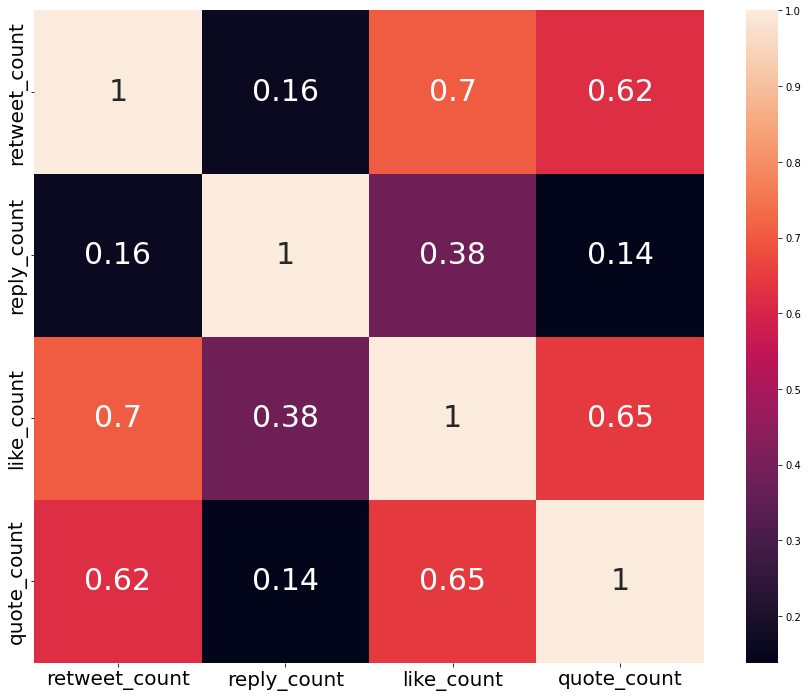

In [80]:
plt.figure(figsize = (15,12))
sns.heatmap(data[["retweet_count", "reply_count", "like_count", "quote_count"]].corr(), annot = True, annot_kws = {"size":30})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

c:\Users\tonim\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\tonim\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\tonim\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

Text(0, 0.5, 'quote_count')

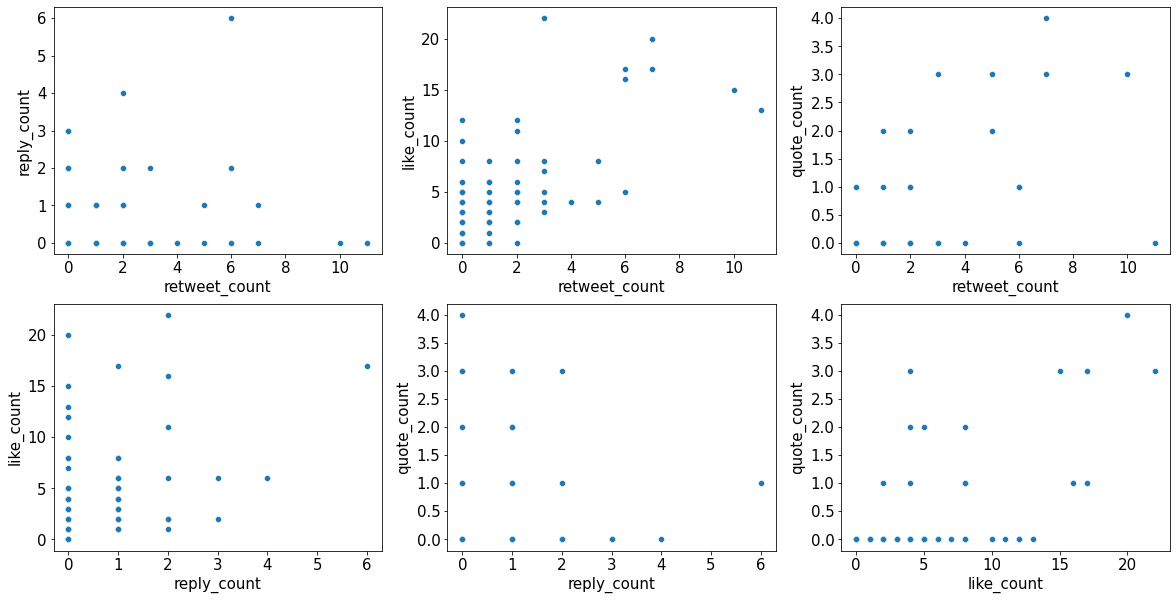

In [90]:
plt.figure(figsize = (20,10));
plt.subplot(2,3,1);
sns.scatterplot(data["retweet_count"], data["reply_count"]);
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('retweet_count', fontsize=15)
plt.ylabel('reply_count', fontsize=15)
plt.subplot(2,3,2);
sns.scatterplot(data["retweet_count"], data["like_count"]);
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('retweet_count', fontsize=15)
plt.ylabel('like_count', fontsize=15)
plt.subplot(2,3,3);
sns.scatterplot(data["retweet_count"], data["quote_count"]);
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('retweet_count', fontsize=15)
plt.ylabel('quote_count', fontsize=15)
plt.subplot(2,3,4);
sns.scatterplot(data["reply_count"], data["like_count"]);
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('reply_count', fontsize=15)
plt.ylabel('like_count', fontsize=15)
plt.subplot(2,3,5);
sns.scatterplot(data["reply_count"], data["quote_count"]);
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('reply_count', fontsize=15)
plt.ylabel('quote_count', fontsize=15)
plt.subplot(2,3,6);
sns.scatterplot(data["like_count"], data["quote_count"]);
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('like_count', fontsize=15)
plt.ylabel('quote_count', fontsize=15)


## F. ¿Has sacado alguna conclusión extra en tu análisis?

# MODELO

In [92]:
import pickle

In [93]:
with open("sentiment_model", "rb") as f:
    modelo = pickle.load(f)

### Ejemplos predicciones

In [94]:
data["mensaje_tweet"][0]

'Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀'

In [122]:
modelo.predict(data["mensaje_tweet"][:0])

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [121]:
data["mensaje_tweet"][:5][4]

'@jorgegrev @TheBridge_Tech Enhorabuena crack!'

In [126]:
data["mensaje_tweet"][9]

'@valerybriz @graphext @TheBridge_Tech Hemos llenado el aforo ⚠️ pero ¡aún estás a tiempo de apuntarte a la lista de espera! ¡Nos vemos el jueves!'

## feature importance

In [ ]:
modelo["vect"].vocabulary_

In [98]:
coef = np.abs(modelo["cls"].coef_[0])

In [99]:
coef = np.sort(np.abs(modelo["cls"].coef_[0]))[-7:]

In [100]:
indice_coef = []

In [101]:
for x in np.sort(np.abs(modelo["cls"].coef_[0]))[-7:]:
    indice_coef.append(list(coef).index(x))

In [102]:
indice_coef

[0, 1, 2, 3, 4, 5, 6]

In [103]:
nombres_indice = []

In [104]:
for x in indice_coef:
    nombres_indice.append(list(modelo["vect"].vocabulary_)[x])

In [105]:
nombres_indice

['graci', 'mar', 'pens', 'va', 'van', 'intent', 'sac']

In [106]:
nombres_indice_reversed = []
coef_reversed = []

In [107]:
for x in reversed(nombres_indice):
    nombres_indice_reversed.append(x)
for x in reversed(coef):
    coef_reversed.append(x)

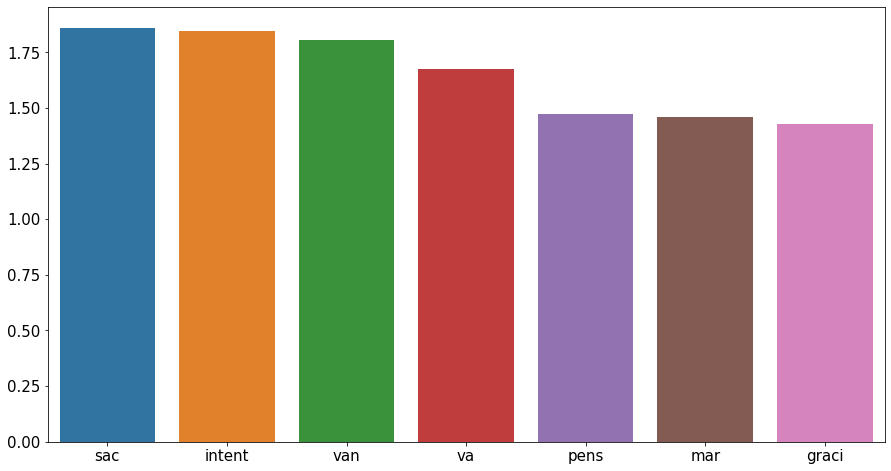

In [113]:
plt.figure(figsize = (15,8))
sns.barplot(x = nombres_indice_reversed, y = coef_reversed)
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

## > El modelo se podría mejorar añadiendo variables que valoren grupos de palabras, eliminando las variables que representan palabras sin importancia, como determinantes, conjunciones, preposiciones, eliminando la distincion entre plurales, singulares y tiempos verbales.

## > El machine learning se podría aplicar por ejemplo a intentar predecir cuanta repercusión tendrá un tweet teniendo en cuenta los likes y retweets o qué tweet le va a gustar a una clase concreta de perfiles o los espacios le puede gustar.